In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

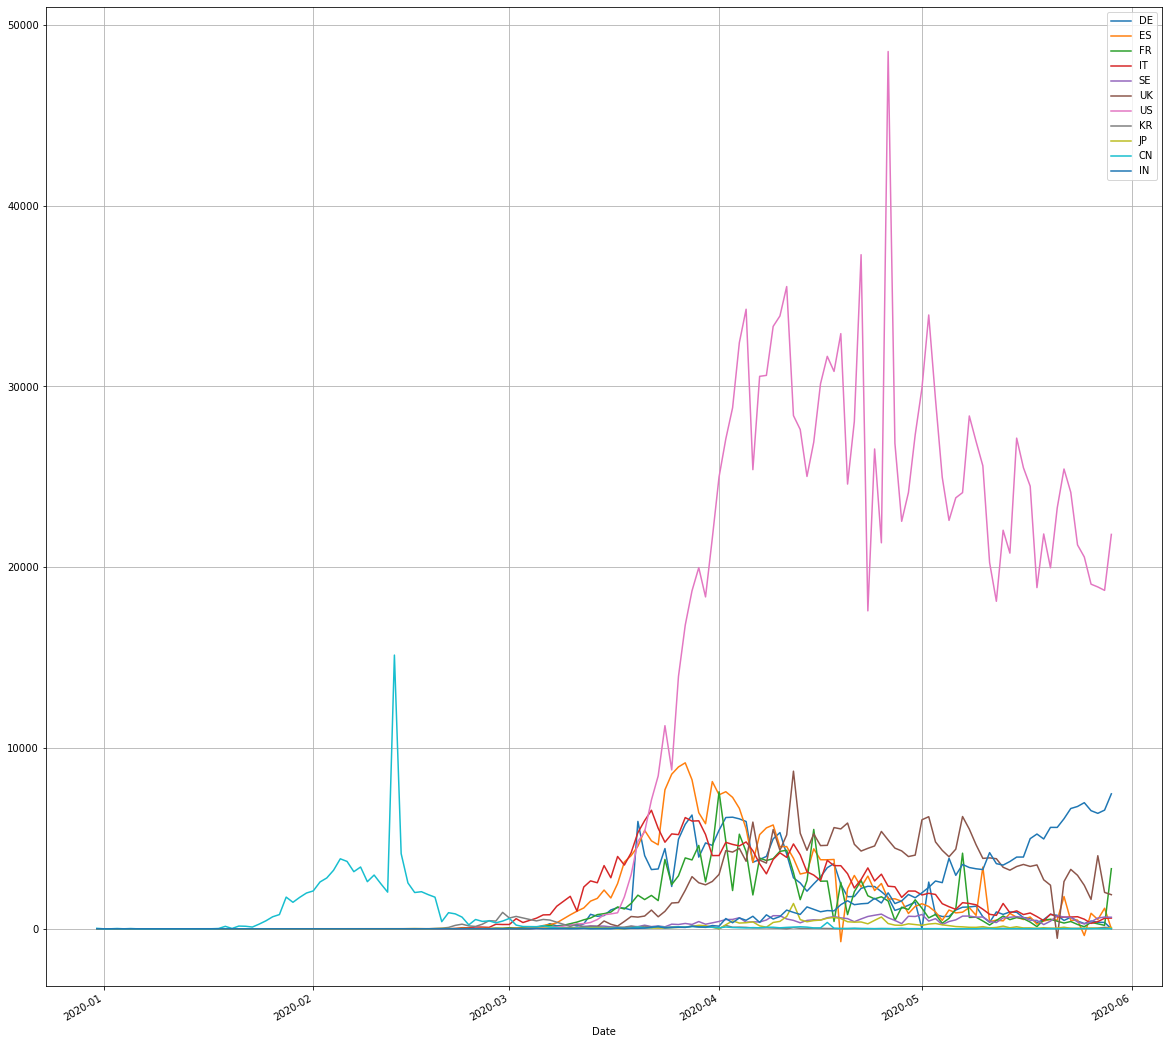

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

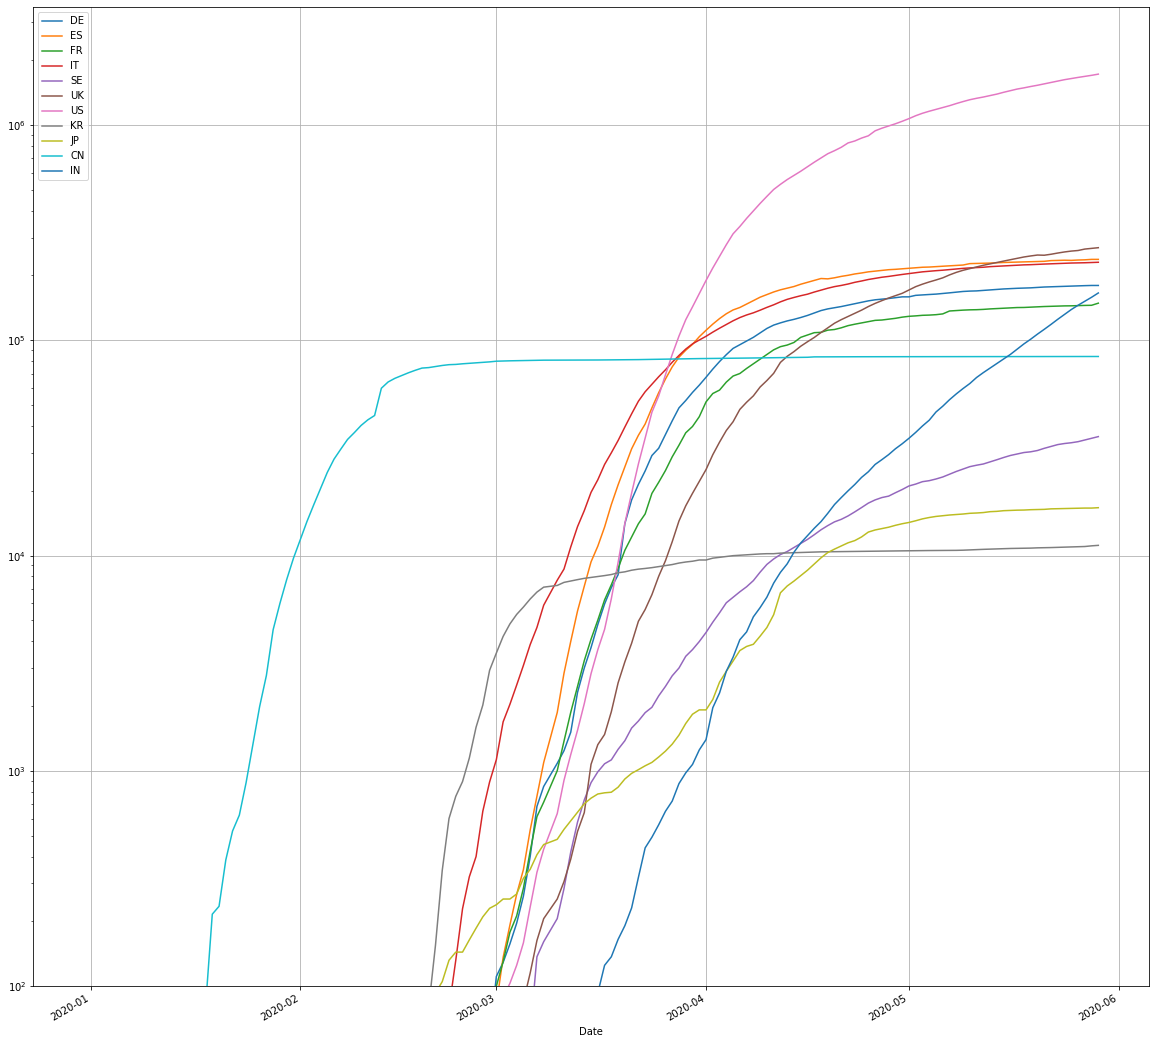

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

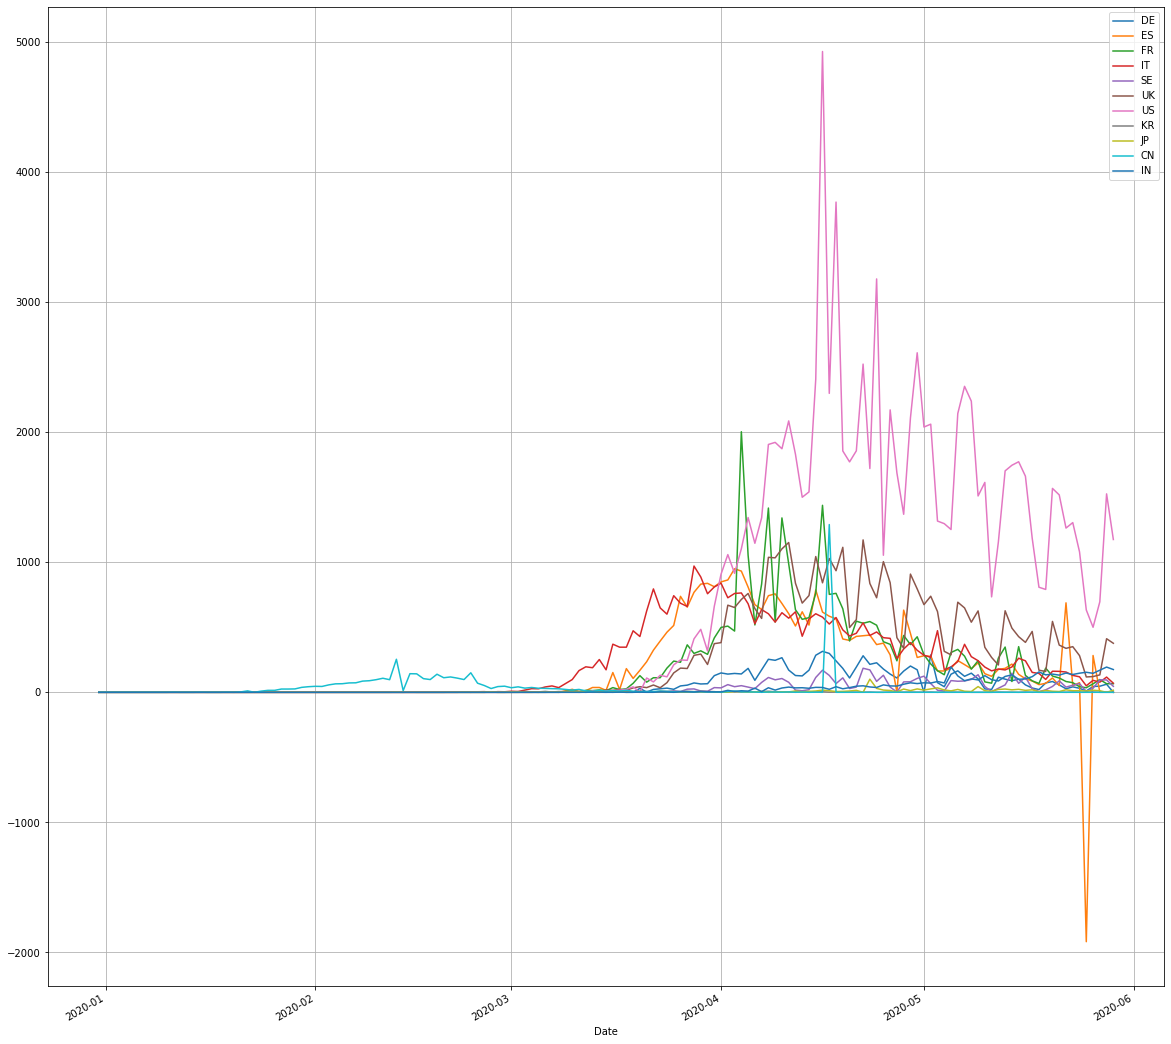

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

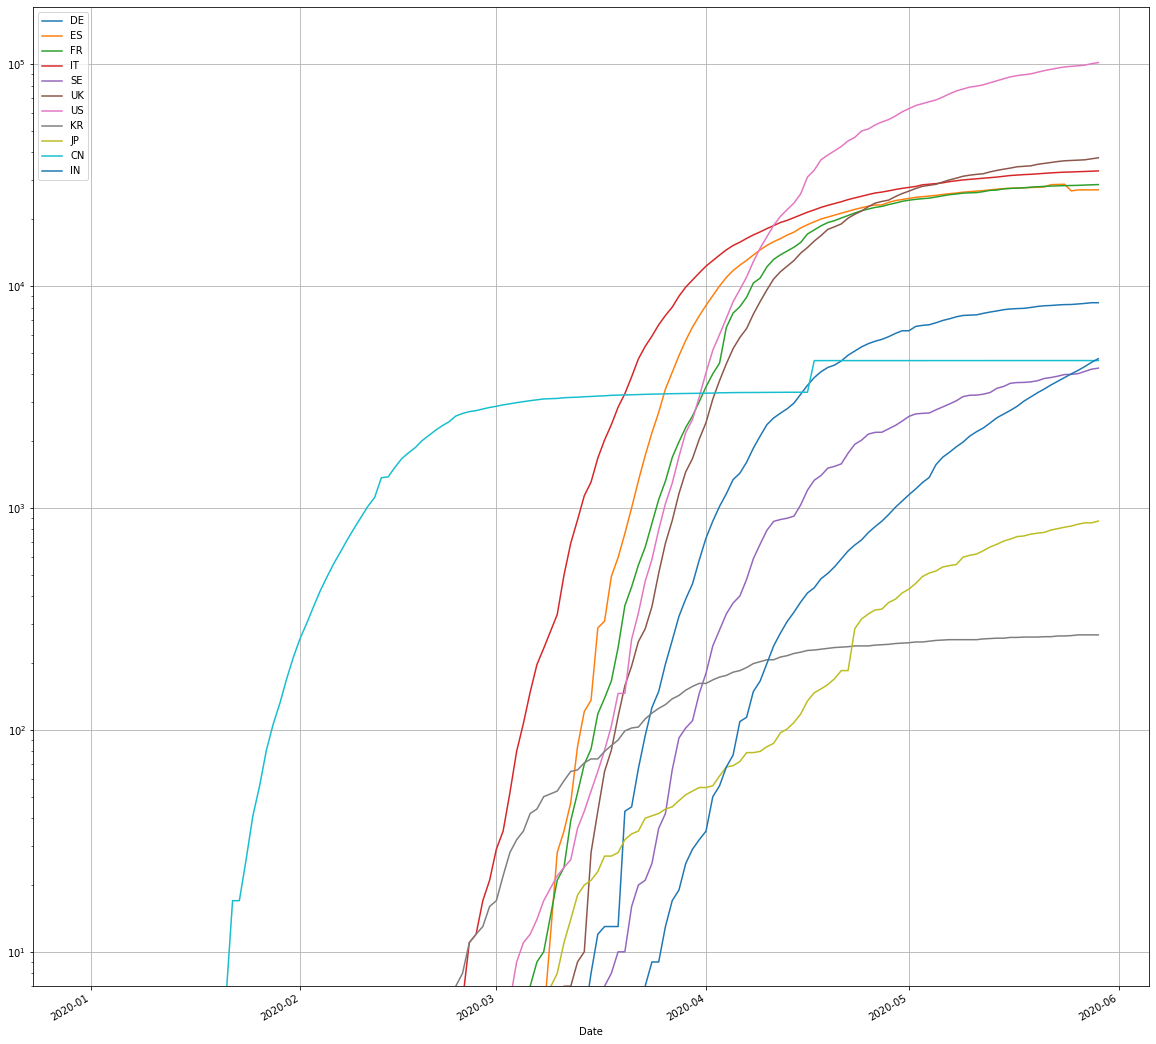

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-05-15,913.0,643.0,622,992,673,3446,27143,27,114,5,3967
12,2020-05-16,620.0,515.0,563,789,625,3560,25508,19,44,9,3970
11,2020-05-17,583.0,652.0,372,875,470,3450,24487,13,48,6,4987
10,2020-05-18,342.0,256.0,120,675,466,3534,18873,15,20,10,5242
9,2020-05-19,513.0,431.0,492,451,234,2711,21841,13,60,9,4970
8,2020-05-20,797.0,518.0,524,813,422,2412,19970,32,20,2,5611
7,2020-05-21,745.0,482.0,418,665,724,-525,23285,12,39,2,5609
6,2020-05-22,460.0,1787.0,318,642,649,2615,25434,20,89,12,6088
5,2020-05-23,638.0,466.0,403,652,637,3287,24147,23,23,2,6654
4,2020-05-24,431.0,482.0,240,669,379,2959,21236,25,14,3,6767


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-05-15,173097.0,229750.0,140946.0,221604.0,28540.0,233084.0,1417768.0,10770.0,16160.0,83984.0,81970.0
2020-05-16,173717.0,230265.0,141509.0,222393.0,29165.0,236644.0,1443276.0,10789.0,16204.0,83993.0,85940.0
2020-05-17,174300.0,230917.0,141881.0,223268.0,29635.0,240094.0,1467763.0,10802.0,16252.0,83999.0,90927.0
2020-05-18,174642.0,231173.0,142001.0,223943.0,30101.0,243628.0,1486636.0,10817.0,16272.0,84009.0,96169.0
2020-05-19,175155.0,231604.0,142493.0,224394.0,30335.0,246339.0,1508477.0,10830.0,16332.0,84018.0,101139.0
2020-05-20,175952.0,232122.0,143017.0,225207.0,30757.0,248751.0,1528447.0,10862.0,16352.0,84020.0,106750.0
2020-05-21,176697.0,232604.0,143435.0,225872.0,31481.0,248226.0,1551732.0,10874.0,16391.0,84022.0,112359.0
2020-05-22,177157.0,234391.0,143753.0,226514.0,32130.0,250841.0,1577166.0,10894.0,16480.0,84034.0,118447.0
2020-05-23,177795.0,234857.0,144156.0,227166.0,32767.0,254128.0,1601313.0,10917.0,16503.0,84036.0,125101.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-05-15,101.0,138.0,351,262,69,428,1773,0,23,0,100
12,2020-05-16,57.0,104.0,130,242,117,384,1662,2,15,0,103
11,2020-05-17,33.0,87.0,88,153,28,468,1186,0,19,1,120
10,2020-05-18,21.0,59.0,68,145,5,170,808,1,5,0,157
9,2020-05-19,72.0,69.0,186,99,19,160,791,0,14,0,134
8,2020-05-20,83.0,110.0,125,162,45,545,1568,0,8,0,140
7,2020-05-21,57.0,52.0,110,161,88,363,1518,1,6,0,132
6,2020-05-22,27.0,688.0,83,156,40,338,1263,0,19,0,148
5,2020-05-23,42.0,50.0,74,130,54,351,1305,2,12,0,137
4,2020-05-24,31.0,74.0,43,119,67,282,1080,0,12,0,147


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-05-15,7824.0,27459.0,27416.0,31235.0,3529.0,33614.0,85902.0,259.0,709.0,4614.0,2649.0
2020-05-16,7881.0,27563.0,27546.0,31477.0,3646.0,33998.0,87564.0,261.0,724.0,4614.0,2752.0
2020-05-17,7914.0,27650.0,27634.0,31630.0,3674.0,34466.0,88750.0,261.0,743.0,4615.0,2872.0
2020-05-18,7935.0,27709.0,27702.0,31775.0,3679.0,34636.0,89558.0,262.0,748.0,4615.0,3029.0
2020-05-19,8007.0,27778.0,27888.0,31874.0,3698.0,34796.0,90349.0,262.0,762.0,4615.0,3163.0
2020-05-20,8090.0,27888.0,28013.0,32036.0,3743.0,35341.0,91917.0,262.0,770.0,4615.0,3303.0
2020-05-21,8147.0,27940.0,28123.0,32197.0,3831.0,35704.0,93435.0,263.0,776.0,4615.0,3435.0
2020-05-22,8174.0,28628.0,28206.0,32353.0,3871.0,36042.0,94698.0,263.0,795.0,4615.0,3583.0
2020-05-23,8216.0,28678.0,28280.0,32483.0,3925.0,36393.0,96003.0,265.0,807.0,4615.0,3720.0
